# Diversification

Harold's company wants to build a diversified stock portfolio. So far, it has added `BMO` (Bank of Montreal) and `CNQ` (Canadian Natural Resources Limited), which reside within the Financial Services and Energy sectors in [the S&P TSX 60 index](https://en.wikipedia.org/wiki/S%26P/TSX_60), respectively. Now they want to add a third energy sector stock to the mix.

Harold's manager has asked him to research a set of five energy stocks to add to the existing portfolio. To create a diversified portfolio that tends to minimize long-term volatility/risk, stocks within the portfolio should be as uncorrelated as possible so as to create a counterbalance effect (i.e, when some stocks fall in price, others may rise in price).

Use the Pandas library to help Harold analyze five energy stocks—`CVE`, `ENB`, `IMO`, `IPL`, and `TRP`—and choose the stock with the least correlation to `BMO` and `CNQ`.

## Instructions

## Import libraries and dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns

%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Set file paths
cnq_data = Path("../Resources/CNQ.csv")
bmo_data = Path("../Resources/BMO.csv")
cve_data = Path("../Resources/CVE.csv")
enb_data = Path("../Resources/ENB.csv")
imo_data = Path("../Resources/IMO.csv")
ipl_data = Path("../Resources/IPL.csv")
trp_data = Path("../Resources/TRP.csv")

# Read the individual CSV datasets
cnq_df = pd.read_csv(cnq_data, index_col="date")
bmo_df = pd.read_csv(bmo_data, index_col="date")
cve_df = pd.read_csv(cve_data, index_col="date")
enb_df = pd.read_csv(enb_data, index_col="date")
imo_df = pd.read_csv(imo_data, index_col="date")
ipl_df = pd.read_csv(ipl_data, index_col="date")
trp_df = pd.read_csv(trp_data, index_col="date")

# Display sample data from `BMO` (all files have the same structure)
bmo_df.head()

,BMO
date,
5/14/19,66.97
5/13/19,66.49
5/10/19,67.22
5/9/19,66.04
5/8/19,66.02


### Combine the DataFrames

In [3]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([cnq_df, bmo_df, cve_df, enb_df, imo_df, ipl_df, trp_df], axis="columns", join="inner")
combined_df.head()

,CNQ,BMO,CVE,ENB,IMO,IPL,TRP
date,,,,,,,
5/14/19,191.62,66.97,45.17,27.32,38.51,162.04,41.97
5/13/19,190.34,66.49,44.76,26.24,37.38,158.45,40.99
5/10/19,194.58,67.22,46.20,27.96,38.94,168.82,42.83
5/9/19,194.58,66.04,46.62,27.21,39.27,170.19,43.25
5/8/19,195.17,66.02,49.24,27.09,39.75,173.92,43.70


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change()
daily_returns.head()

,CNQ,BMO,CVE,ENB,IMO,IPL,TRP
date,,,,,,,
5/14/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/13/19,-0.006680,-0.007167,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
5/10/19,0.022276,0.010979,0.032172,0.065549,0.041734,0.065447,0.044889
5/9/19,0.000000,-0.017554,0.009091,-0.026824,0.008475,0.008115,0.009806
5/8/19,0.003032,-0.000303,0.056199,-0.004410,0.012223,0.021917,0.010405


### Calculate Correlation

In [5]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,CNQ,BMO,CVE,ENB,IMO,IPL,TRP
CNQ,1.000000,0.329386,0.429047,0.294653,0.375932,0.360918,0.393293
BMO,0.329386,1.000000,0.318188,0.254498,0.337060,0.257717,0.317493
CVE,0.429047,0.318188,1.000000,0.385877,0.511066,0.483262,0.500741
ENB,0.294653,0.254498,0.385877,1.000000,0.438329,0.471212,0.352482
IMO,0.375932,0.337060,0.511066,0.438329,1.000000,0.517198,0.477247
IPL,0.360918,0.257717,0.483262,0.471212,0.517198,1.000000,0.472496
TRP,0.393293,0.317493,0.500741,0.352482,0.477247,0.472496,1.000000


### Plot Correlation

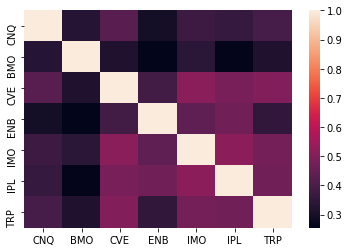

In [6]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)

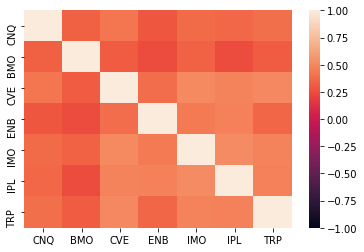

In [7]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

### Which energy stock would be the best candidate to add to the existing portfolio?

**Sample Answer:** `ENB` stock would be the best candidate to add to the existing portfolio as it is the stock that has the least correlation with `BMO` and `CNQ`.